In [44]:
%pip install astropy
%pip install opencv-python
import cv2 as cv
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
plt.style.use(astropy_mpl_style)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
image_file = get_pkg_data_filename('../dataset/23495+10405S.fits')

In [42]:
fits.info(image_file)

Filename: ..\dataset\23495+10405S.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   (1550, 1150, 1, 1)   float32   
  1  AIPS CG       1 BinTableHDU     23   1R x 4C   [1D, 1E, 1E, 1E]   
  2  AIPS NN       1 BinTableHDU     26   8R x 5C   [12A, 1A, 1D, 1D, 1E]   
  3  AIPS MF       1 BinTableHDU     99   61R x 28C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   


In [49]:
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)


(1, 1, 1150, 1550)


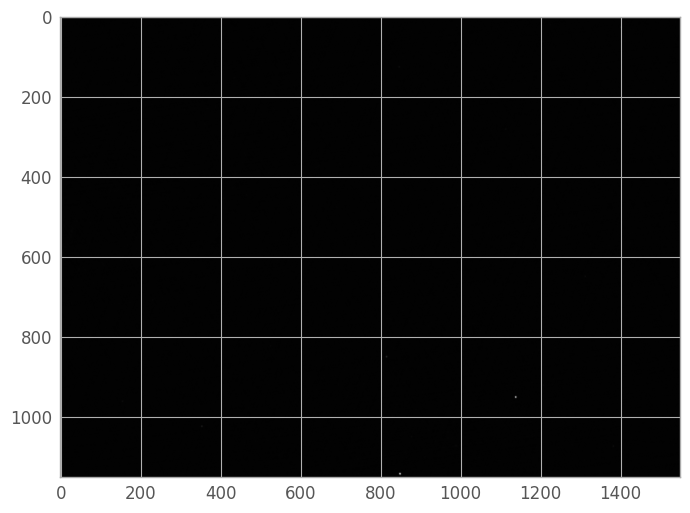

In [50]:
plt.imshow(image_data[0, 0], cmap='gray') 
plt.show()

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras import regularizers

inputs = Input(shape=(64,64,3))
a = Conv2D(128, kernel_size = (3,3), padding = "valid", strides=(2, 2), activation="relu")(inputs)
a = Flatten()(a)

b = Conv2D(64, kernel_size = (4,4), padding = "valid", activation="relu")(inputs)
b = MaxPooling2D(pool_size=(2,2))(b)
b = Flatten()(b)

c = Conv2D(64, kernel_size = (2,2), padding = "valid", activation="relu")(inputs)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Flatten()(c)

x = keras.layers.concatenate([a, b, c])
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output = Dense(units = 4, activation='softmax')(x)

classifier = keras.Model(inputs=inputs, outputs=output)

classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [28]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="optimal_model_weights.h5",
        save_best_only = "True",
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)
]
history = classifier.fit(train_image_arr, train_label, epochs = 2, validation_data = (test_image_arr, test_label), callbacks = callbacks)

Epoch 1/2
62/62 [==============================] - 29s 448ms/step - loss: 355.1724 - accuracy: 0.3114 - val_loss: 1.3850 - val_accuracy: 0.2452
Epoch 2/2
62/62 [==============================] - 27s 440ms/step - loss: 1.3683 - accuracy: 0.3170 - val_loss: 1.3703 - val_accuracy: 0.4667


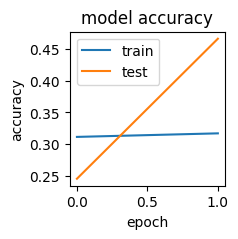

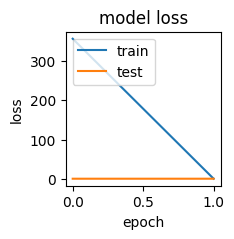

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(2, 2))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
fig = plt.figure(figsize=(2, 2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()